# Example usage of py-madaclim

## Raster layers metadata with MadaclimLayers class from py_madaclim.info module

### Layers dataframe containing with all metadata

In [1]:
from py_madaclim.info import MadaclimLayers

Instantiate a `MadaclimLayers` object and explore the information about the rasters in the Madaclim db 

In [2]:
# Instantiate the MadaclimLayers without the rasters
mada_info = MadaclimLayers()

print(mada_info)

MadaclimLayers(
	all_layers = DataFrame(79 rows x 6 columns)
	categorical_layers = DataFrame(Layers 75, 76, 77, 78 with a total of 79 categories
	public methods -> download_data, fetch_specific_layers, get_categorical_combinations
			 get_layers_labels, select_geoclim_type_layers
)


The `all_layers` property is a Dataframe containing all layers information

In [3]:
print(mada_info.all_layers.shape)
mada_info.all_layers

(79, 6)


,geoclim_type,layer_number,layer_name,layer_description,is_categorical,units
0,clim,1,tmin1,Monthly minimum temperature - January,False,°C x 10
1,clim,2,tmin2,Monthly minimum temperature - February,False,°C x 10
2,clim,3,tmin3,Monthly minimum temperature - March,False,°C x 10
3,clim,4,tmin4,Monthly minimum temperature - April,False,°C x 10
4,clim,5,tmin5,Monthly minimum temperature - May,False,°C x 10
...,...,...,...,...,...,...
74,env,75,geo,Rock types,True,"[1=Alluvial_&_Lake_deposits, 2=Unconsolidated_..."
75,env,76,soi,Soil types,True,"[1=Bare_Rocks, 2=Raw_Lithic_Mineral_Soils, 3=P..."
76,env,77,veg,Vegetation types,True,"[1=VegCat_01, 2=VegCat_02, 3=VegCat_03, 4=VegC..."
77,env,78,wat,Watersheds,True,"[1=CoE_N-Bemarivo, 2=CoE_S-Bemarivo_N-Mangoro,..."


An in-depth look at the categorical layers in the Madaclim db with the `categorical_layers` property

In [4]:
mada_info.categorical_layers.head()

,geoclim_type,layer_number,layer_name,layer_description,raster_value,category
0,env,75,geo,Rock types,1,Alluvial_&_Lake_deposits
1,env,75,geo,Rock types,2,Unconsolidated_Sands
2,env,75,geo,Rock types,4,Mangrove_Swamp
3,env,75,geo,Rock types,5,Tertiary_Limestones_+_Marls_&_Chalks
4,env,75,geo,Rock types,6,Sandstones


Madaclim db contains 'climate'(`clim`) and 'environmental'(`env`) type raster layers. Filter the dataframe with the `select_geoclim_type_layers` method.

In [5]:
mada_info.select_geoclim_type_layers(geoclim_type="env")

,geoclim_type,layer_number,layer_name,layer_description,is_categorical,units
70,env,71,alt,Altitude,False,meters
71,env,72,slo,Slope,False,degrees
72,env,73,asp,Aspect; clockwise from North,False,degrees
73,env,74,solrad,"Solar radiation; computed from altitude, slope...",False,Wh.m-2.day-1
74,env,75,geo,Rock types,True,"[1=Alluvial_&_Lake_deposits, 2=Unconsolidated_..."
75,env,76,soi,Soil types,True,"[1=Bare_Rocks, 2=Raw_Lithic_Mineral_Soils, 3=P..."
76,env,77,veg,Vegetation types,True,"[1=VegCat_01, 2=VegCat_02, 3=VegCat_03, 4=VegC..."
77,env,78,wat,Watersheds,True,"[1=CoE_N-Bemarivo, 2=CoE_S-Bemarivo_N-Mangoro,..."
78,env,79,forcov,Percentage of forest cover in 1 km by 1 km gri...,False,%


### Layers labels for downstream applications

Extract the layers labels in a simple format with the `get_layers_labels` method. All values are unique

In [6]:
all_labels = mada_info.get_layers_labels()    # Defaults to "all" for all layers
all_labels[:5]

['layer_1', 'layer_2', 'layer_3', 'layer_4', 'layer_5']

In [7]:
# Extract environmental layers only
env_layers = mada_info.get_layers_labels(layers_subset="env")
env_layers

['layer_71',
 'layer_72',
 'layer_73',
 'layer_74',
 'layer_75',
 'layer_76',
 'layer_77',
 'layer_78',
 'layer_79']

Option for a more detailed label format

In [8]:
# Get a single layer with a more descriptive label
mada_info.get_layers_labels(37, as_descriptive_labels=True)

['clim_37_bio1_Annual mean temperature (degrees)']

In [9]:
# Categorical layers contains the possible raster values for each categories
categ_layers_nums = list(mada_info.categorical_layers["layer_number"].unique())
mada_info.get_layers_labels(categ_layers_nums, as_descriptive_labels=True)

['env_75_geo_Rock types (categ_vals: 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13)',
 'env_76_soi_Soil types (categ_vals: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)',
 'env_77_veg_Vegetation types (categ_vals: 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 22, 23, 25)',
 'env_78_wat_Watersheds (categ_vals: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25)']

Extract a subset of layers based on layer number and taking advantage of the descriptive naming structure of the `as_descriptive_out` output:

 \<geoclim_type>\_\<dasd>\_\<unique_layername>\_\<details>

In [10]:
# Layers subset with a more descriptive label
labels_37_55 = mada_info.get_layers_labels(list(range(37, 56)), as_descriptive_labels=True)

# Or using the unique_layername
bioclim_labels = [label for label in mada_info.get_layers_labels(as_descriptive_labels=True) if "bio" in label]
assert labels_37_55 == bioclim_labels

### Fetch specific layers

Fetch specific layers using the previously generated labels, or numbers, we can fetch specific data from the `all_layers` df

In [11]:
# From a list of layer_numbers
mada_info.fetch_specific_layers([1, 15, 55, 71])

,geoclim_type,layer_number,layer_name,layer_description,is_categorical,units
0,clim,1,tmin1,Monthly minimum temperature - January,False,°C x 10
14,clim,15,tmax3,Monthly maximum temperature - March,False,°C x 10
54,clim,55,bio19,Precipitation of coldest quarter,False,mm.3months-1
70,env,71,alt,Altitude,False,meters


In [12]:
# Using the output from `get_layers_labels` method
print(bioclim_labels)
mada_info.fetch_specific_layers(layers_labels=bioclim_labels)

['clim_37_bio1_Annual mean temperature (degrees)', 'clim_38_bio2_Mean diurnal range (mean of monthly max temp - monthy min temp)', 'clim_39_bio3_Isothermality = BIO2/BIO7 x 100 (No units)', 'clim_40_bio4_Temperature seasonality (standard deviation x 100)', 'clim_41_bio5_Max temperature of warmest month (degrees)', 'clim_42_bio6_Min temperature of coldest month (degrees)', 'clim_43_bio7_Temperature annual range  = BIO5-BIO6 (degrees)', 'clim_44_bio8_Mean temperature of wettest quarter (degrees)', 'clim_45_bio9_Mean temperature of driest quarter (degrees)', 'clim_46_bio10_Mean temperature of warmest quarter (degrees)', 'clim_47_bio11_Mean temperature of coldest quarter (degrees)', 'clim_48_bio12_Annual precipitation (mm.year-1)', 'clim_49_bio13_Precipitation of wettest month (mm)', 'clim_50_bio14_Precipitation of driest month (mm)', 'clim_51_bio15_Precipitation seasonality (coefficient of variation)', 'clim_52_bio16_Precipitation of wettest quarter (mm.3months-1)', 'clim_53_bio17_Precipi

,geoclim_type,layer_number,layer_name,layer_description,is_categorical,units
36,clim,37,bio1,Annual mean temperature,False,degrees
37,clim,38,bio2,Mean diurnal range,False,mean of monthly max temp - monthy min temp
38,clim,39,bio3,Isothermality = BIO2/BIO7 x 100,False,No units
39,clim,40,bio4,Temperature seasonality,False,standard deviation x 100
40,clim,41,bio5,Max temperature of warmest month,False,degrees
41,clim,42,bio6,Min temperature of coldest month,False,degrees
42,clim,43,bio7,Temperature annual range = BIO5-BIO6,False,degrees
43,clim,44,bio8,Mean temperature of wettest quarter,False,degrees
44,clim,45,bio9,Mean temperature of driest quarter,False,degrees
45,clim,46,bio10,Mean temperature of warmest quarter,False,degrees


In [13]:
# or from simple labels
print(env_layers)
mada_info.fetch_specific_layers(env_layers,)

['layer_71', 'layer_72', 'layer_73', 'layer_74', 'layer_75', 'layer_76', 'layer_77', 'layer_78', 'layer_79']


,geoclim_type,layer_number,layer_name,layer_description,is_categorical,units
70,env,71,alt,Altitude,False,meters
71,env,72,slo,Slope,False,degrees
72,env,73,asp,Aspect; clockwise from North,False,degrees
73,env,74,solrad,"Solar radiation; computed from altitude, slope...",False,Wh.m-2.day-1
74,env,75,geo,Rock types,True,"[1=Alluvial_&_Lake_deposits, 2=Unconsolidated_..."
75,env,76,soi,Soil types,True,"[1=Bare_Rocks, 2=Raw_Lithic_Mineral_Soils, 3=P..."
76,env,77,veg,Vegetation types,True,"[1=VegCat_01, 2=VegCat_02, 3=VegCat_03, 4=VegC..."
77,env,78,wat,Watersheds,True,"[1=CoE_N-Bemarivo, 2=CoE_S-Bemarivo_N-Mangoro,..."
78,env,79,forcov,Percentage of forest cover in 1 km by 1 km gri...,False,%


Pass in any valid position args (column names of the all_layers df) and extract as a nested-dict structure

In [14]:
try:
    mada_info.fetch_specific_layers(10, "layer_info")
except Exception as e:
    print(e)

"Invalid args: ['layer_info']. Args must be one of a key of ['geoclim_type', 'layer_number', 'layer_name', 'layer_description', 'is_categorical', 'units'] or 'all'"


In [15]:
# Fetch as dict with keys as layer_<num> and vals of choice using 
mada_info.fetch_specific_layers([15, 55, 75], "geoclim_type", "layer_name", "is_categorical")

{'layer_15': {'geoclim_type': 'clim',
  'layer_name': 'tmax3',
  'is_categorical': False},
 'layer_55': {'geoclim_type': 'clim',
  'layer_name': 'bio19',
  'is_categorical': False},
 'layer_75': {'geoclim_type': 'env',
  'layer_name': 'geo',
  'is_categorical': True}}

In [16]:
# Get all keys with the `all` argument
mada_info.fetch_specific_layers(bioclim_labels[0], "all")

{'layer_37': {'geoclim_type': 'clim',
  'layer_number': 37,
  'layer_name': 'bio1',
  'layer_description': 'Annual mean temperature',
  'is_categorical': False,
  'units': 'degrees'}}

### Categorical layers

The `categorical_layers` property contains a detailed Dataframe of all the raster layers with categorical data

In [17]:
mada_info.categorical_layers.head()

,geoclim_type,layer_number,layer_name,layer_description,raster_value,category
0,env,75,geo,Rock types,1,Alluvial_&_Lake_deposits
1,env,75,geo,Rock types,2,Unconsolidated_Sands
2,env,75,geo,Rock types,4,Mangrove_Swamp
3,env,75,geo,Rock types,5,Tertiary_Limestones_+_Marls_&_Chalks
4,env,75,geo,Rock types,6,Sandstones


The `get_categorical_combinations` method formats the data as a dict structure of layers/possible categories combinations

In [18]:
# as dict format for all layers
print(mada_info.get_categorical_combinations().keys())
mada_info.get_categorical_combinations()["layer_75"]

dict_keys(['layer_75', 'layer_76', 'layer_77', 'layer_78'])


{1: 'Alluvial_&_Lake_deposits',
 2: 'Unconsolidated_Sands',
 4: 'Mangrove_Swamp',
 5: 'Tertiary_Limestones_+_Marls_&_Chalks',
 6: 'Sandstones',
 7: 'Mesozoic_Limestones_+_Marls_(inc._"Tsingy")',
 9: 'Lavas_(including_Basalts_&_Gabbros)',
 10: 'Basement_Rocks_(Ign_&_Met)',
 11: 'Ultrabasics',
 12: 'Quartzites',
 13: 'Marble_(Cipolin)'}

In [19]:
# If a single layer is specified
mada_info.get_categorical_combinations("layer_76")

{'layer_76': {1: 'Bare_Rocks',
  2: 'Raw_Lithic_Mineral_Soils',
  3: 'Poorly_Evolved_Erosion_Soils,_Lithosols',
  4: 'Wind-deposited_Soils',
  5: 'Alluvio-colluvial_Deposited_Soils',
  6: 'Salty_Deposited_Soils',
  7: 'Fluvio-marine_Deposited_Soils_-_Mangroves',
  8: 'Vertisols',
  9: 'Andosols',
  10: 'Podzolic_Soils_and_Podzols',
  11: 'Hydromorphic_Soils',
  12: 'Red_Fersiallitic_Soils',
  13: 'Yellow_Fersiallitic_Soils',
  14: 'Yellow-red_Ferruginous_Soils_(Red_Sands)',
  15: 'Red_Ferruginous_Soils',
  16: 'Skeletal_Shallow_Eroded_Ferruginous_Soils',
  17: 'Typical_Reddish-brown_Ferralitic_Soils_with_Little_Degrading_Structure',
  18: 'Humic_Ferralitic_Soils',
  19: 'Indurated-Concretion_Ferralitic_Soils',
  20: 'Humic_Rejuvenated_Ferralitic_Soils',
  21: 'Rejuvenated_Ferralitic_Soils_with_Little_Degrading_Structure',
  22: 'Rejuvenated_Ferralitic_Soils_with_Degrading_Structure',
  23: 'Highly_Rejuvenated,_Penevoluted_Ferralitic_Soils'}}

In [20]:
# To match the descriptive labels from the previous output, one can also specify
mada_info.get_categorical_combinations("layer_76", as_descriptive_keys=True)

{'env_76_soi_Soil types (categ_vals: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)': {1: 'Bare_Rocks',
  2: 'Raw_Lithic_Mineral_Soils',
  3: 'Poorly_Evolved_Erosion_Soils,_Lithosols',
  4: 'Wind-deposited_Soils',
  5: 'Alluvio-colluvial_Deposited_Soils',
  6: 'Salty_Deposited_Soils',
  7: 'Fluvio-marine_Deposited_Soils_-_Mangroves',
  8: 'Vertisols',
  9: 'Andosols',
  10: 'Podzolic_Soils_and_Podzols',
  11: 'Hydromorphic_Soils',
  12: 'Red_Fersiallitic_Soils',
  13: 'Yellow_Fersiallitic_Soils',
  14: 'Yellow-red_Ferruginous_Soils_(Red_Sands)',
  15: 'Red_Ferruginous_Soils',
  16: 'Skeletal_Shallow_Eroded_Ferruginous_Soils',
  17: 'Typical_Reddish-brown_Ferralitic_Soils_with_Little_Degrading_Structure',
  18: 'Humic_Ferralitic_Soils',
  19: 'Indurated-Concretion_Ferralitic_Soils',
  20: 'Humic_Rejuvenated_Ferralitic_Soils',
  21: 'Rejuvenated_Ferralitic_Soils_with_Little_Degrading_Structure',
  22: 'Rejuvenated_Ferralitic_Soils_with_Degrading_Struct

### Raster files specific methods

Even without the raster files locally, we saw that we have access to a lot of methods.

Only method we don't have access to is `get_bandnums_from_layers` which returns the band number from given layer(s)

In [21]:
try:
    mada_info.get_bandnums_from_layers(bioclim_labels)
except AttributeError as e:
    print(e)

Undefined attribute: 'clim_raster'. You need to assign a valid pathlib.Path to the related raster attribute first.


Use the `download_data` method to fetch the rasters and save it to disk

In [22]:
from pathlib import Path
cwd = Path.cwd()

raster_files = ["madaclim_current.tif", "madaclim_enviro.tif"]
if not all([(cwd / raster_file).exists() for raster_file in raster_files]):
    mada_info.download_data(save_dir=cwd)


####   Trying get request to Madaclim website...   ####
madaclim_current.tif is 21.8 MB
Server response OK from madaclim.cirad.fr, starting to download madaclim_current.tif
Progress for madaclim_current.tif : 100.00 % completed of 21.8 MB downloaded [ average speed of  3.2 MB/s ]
Done downloading madaclim_current.tif in 6.84 seconds !

####   Trying get request to Madaclim website...   ####
madaclim_enviro.tif is 5.5 MB
Server response OK from madaclim.cirad.fr, starting to download madaclim_enviro.tif
Progress for madaclim_enviro.tif : 100.00 % completed of 5.5 MB downloaded [ average speed of  2.8 MB/s ]
Done downloading madaclim_enviro.tif in 1.99 seconds !


In [23]:
print([file.name for file in cwd.iterdir() if file.suffix == ".tif"])

['madaclim_current.tif', 'madaclim_enviro.tif']


Setting the raster-related attributes of the `mada_info` instance

In [24]:
mada_info.clim_raster = "./madaclim_current.tif"
mada_info.env_raster = "./madaclim_enviro.tif"
print(mada_info)    # Now the 'get_bandnums_from_layers' is visible

MadaclimLayers(
	all_layers = DataFrame(79 rows x 6 columns)
	categorical_layers = DataFrame(Layers 75, 76, 77, 78 with a total of 79 categories
	clim_raster = madaclim_current.tif
	clim_crs = EPSG:32738
	env_raster = madaclim_enviro.tif
	env_crs = EPSG:32738
	public methods -> download_data, fetch_specific_layers, get_bandnums_from_layers
			 get_categorical_combinations, get_layers_labels, select_geoclim_type_layers
)


In [25]:
# Check the CRS
print(mada_info.clim_crs)
assert mada_info.clim_crs == mada_info.env_crs

EPSG:32738


In [26]:
# Example
print(f'layer_75 is band #{mada_info.get_bandnums_from_layers(["layer_75"])[0]} on {mada_info.env_raster.name}')

layer_75 is band #5 on madaclim_enviro.tif


One could also pass in the rasters to the `MadaclimLayers` constructor

In [27]:
MadaclimLayers(clim_raster="madaclim_current.tif", env_raster="madaclim_enviro.tif")

MadaclimLayers(
	all_layers = DataFrame(79 rows x 6 columns)
	categorical_layers = DataFrame(Layers 75, 76, 77, 78 with a total of 79 categories
	clim_raster = madaclim_current.tif
	clim_crs = EPSG:32738
	env_raster = madaclim_enviro.tif
	env_crs = EPSG:32738
	public methods -> download_data, fetch_specific_layers, get_bandnums_from_layers
			 get_categorical_combinations, get_layers_labels, select_geoclim_type_layers
)

## Exploring the raster data from the Madaclim db using the MadaclimRasters class

### Using layers label to visualize the raster maps

Instantiate a `MadaclimRasters` object

In [28]:
from py_madaclim.raster_manipulation import MadaclimRasters

mada_rasters = MadaclimRasters(clim_raster=cwd / "madaclim_current.tif", env_raster=cwd / "madaclim_enviro.tif")
print(mada_rasters)

MadaclimRasters(
	clim_raster = madaclim_current.tif,
	clim_crs = EPSG:32738,
	clim_nodata_val = -32768.0
	env_raster = madaclim_enviro.tif,
	env_crs = EPSG:32738,
	env_nodata_val = -32768.0
)


**Continuous layers visualization**

Using the `plot_layer` method, we can look at a single layer for the whole map of madagascar

(<Figure size 1200x600 with 3 Axes>,
 array([<Axes: title={'center': 'Madagascar Env Raster Map (band=1)'}>,
        <Axes: title={'center': 'Distribution of raster values at 1km resolution'}, xlabel='meters', ylabel='Percent'>],
       dtype=object))

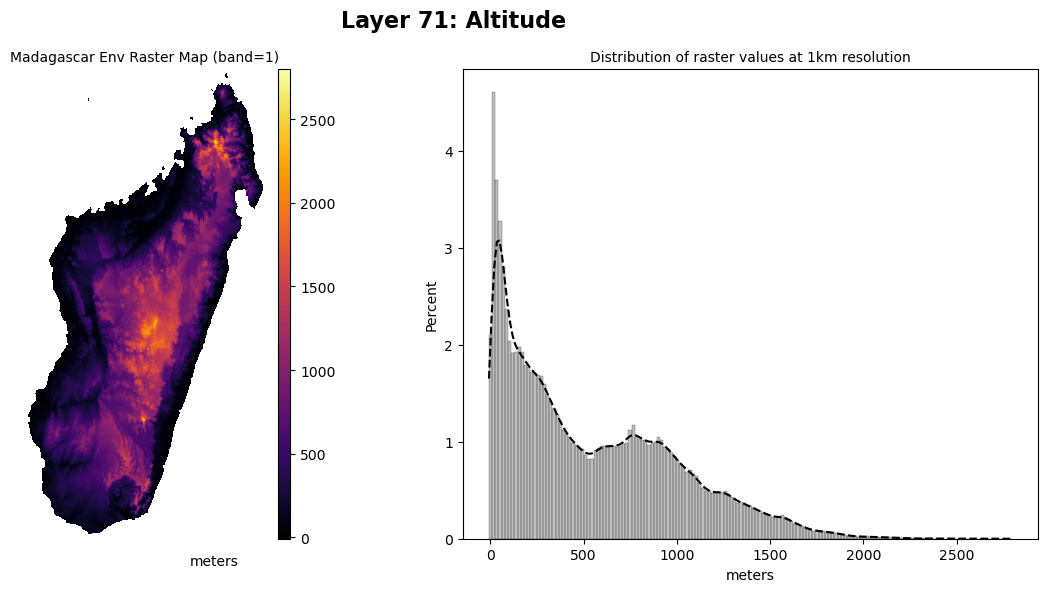

In [29]:
# Default visualization
mada_rasters.plot_layer(71)    # Also accepts layer="layer_71"

Pass in any number of kwargs to the imshow or cax (raster + colorbarax) or histplot or subplots for customization

In [30]:
env_labels = mada_info.get_layers_labels(
    layers_subset="env", 
    as_descriptive_labels=True
)
env_labels

['env_71_alt_Altitude (meters)',
 'env_72_slo_Slope (degrees)',
 'env_73_asp_Aspect; clockwise from North (degrees)',
 'env_74_solrad_Solar radiation; computed from altitude, slope and aspect (Wh.m-2.day-1)',
 'env_75_geo_Rock types (categ_vals: 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13)',
 'env_76_soi_Soil types (categ_vals: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)',
 'env_77_veg_Vegetation types (categ_vals: 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 22, 23, 25)',
 'env_78_wat_Watersheds (categ_vals: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25)',
 'env_79_forcov_Percentage of forest cover in 1 km by 1 km grid cells (%)']

(<Figure size 1500x1000 with 3 Axes>,
 array([<Axes: title={'center': 'Madagascar Env Raster Map (band=1)'}>,
        <Axes: title={'center': 'Distribution of raster values at 1km resolution'}, xlabel='meters', ylabel='Count'>],
       dtype=object))

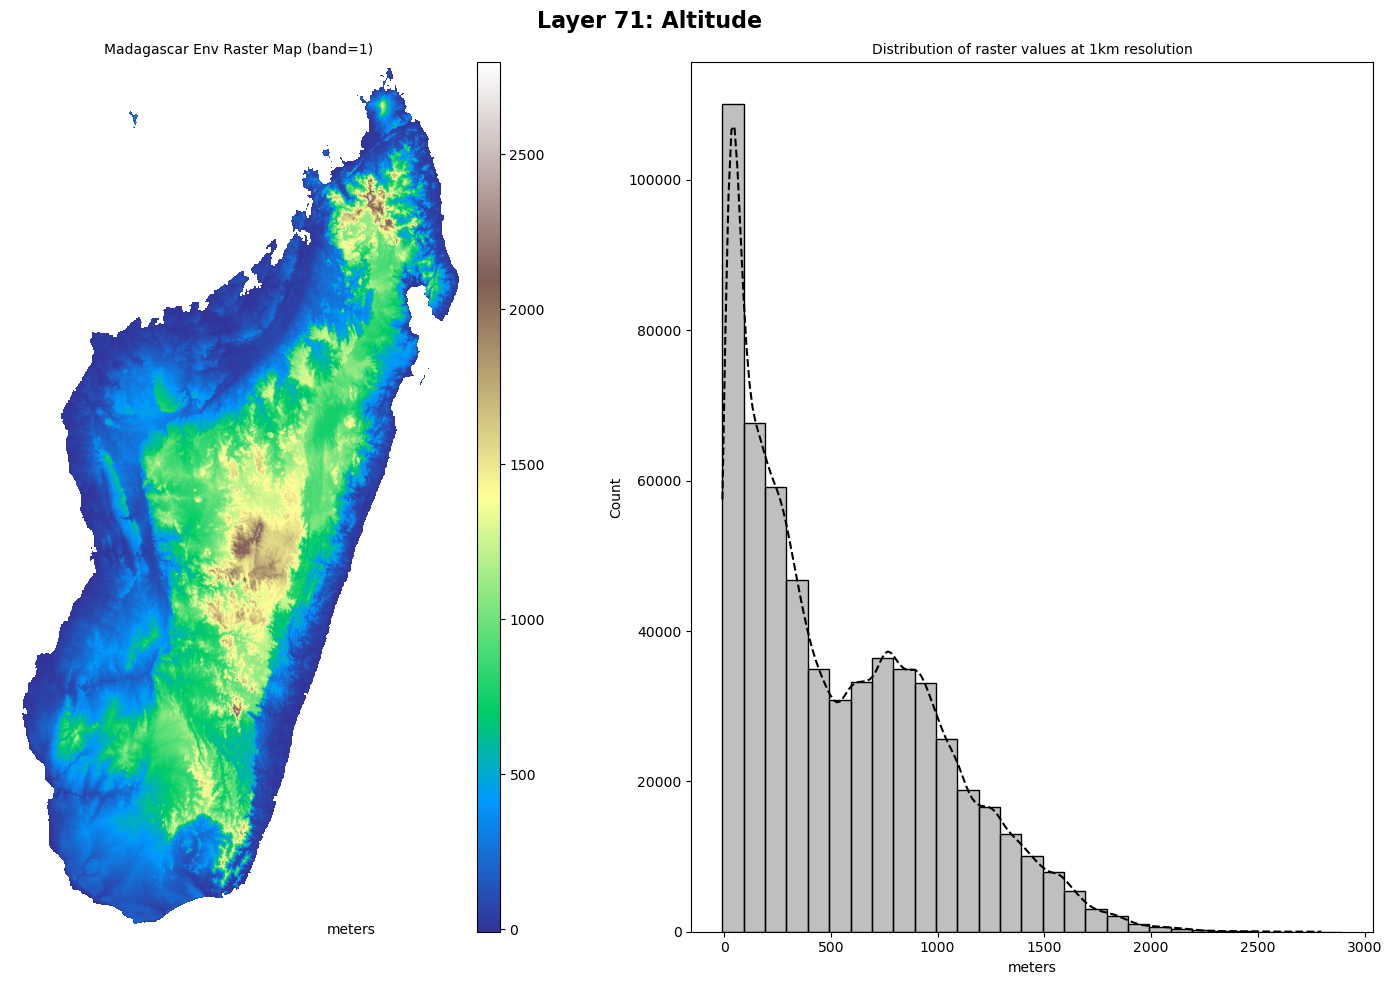

In [31]:
mada_rasters.plot_layer(
    layer=env_labels[0], 
    imshow_cmap="terrain", 
    histplot_binwidth=100, histplot_stat="count", 
    subplots_figsize=(15, 10)
)

For numerical features with highly skewed distribution, specify vmin or vmax for the raster map to at least have a better colorbar scaling

(<Figure size 1200x600 with 3 Axes>,
 array([<Axes: title={'center': 'Madagascar Env Raster Map (band=4)'}>,
        <Axes: title={'center': 'Distribution of raster values at 1km resolution'}, xlabel='Wh.m-2.day-1', ylabel='Percent'>],
       dtype=object))

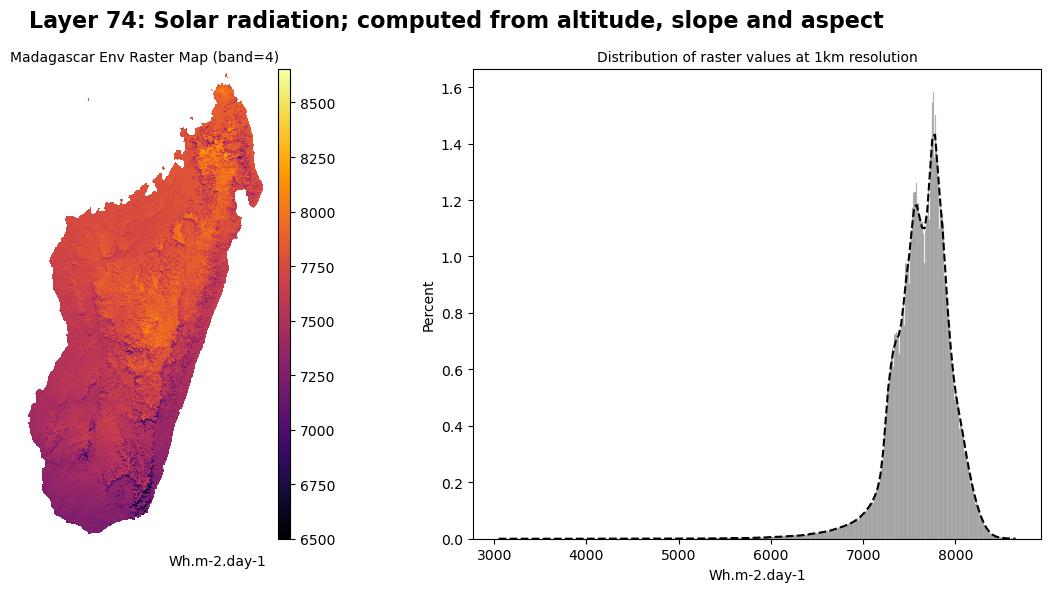

In [32]:
# For numerical features with highly skewed distribution, specify vmin or vmax for the raster map
mada_rasters.plot_layer(layer=env_labels[3], imshow_vmin=6500)

**Categorical layers visualization**

In [33]:
categ_layers = mada_info.get_categorical_combinations(as_descriptive_keys=True)
print(f"There are {len(categ_layers)} categorical layers in the Madaclim db:\n")
for layer in categ_layers:
    print(layer)

There are 4 categorical layers in the Madaclim db:

env_75_geo_Rock types (categ_vals: 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13)
env_76_soi_Soil types (categ_vals: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
env_77_veg_Vegetation types (categ_vals: 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 22, 23, 25)
env_78_wat_Watersheds (categ_vals: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25)


(<Figure size 1200x800 with 2 Axes>,
 array([<Axes: title={'center': 'Madagascar Env Raster Map (band=5)'}>,
        <Axes: title={'center': 'Distribution of raster values at 1km resolution'}, xlabel='Categorical values', ylabel='Percent (%)'>],
       dtype=object))

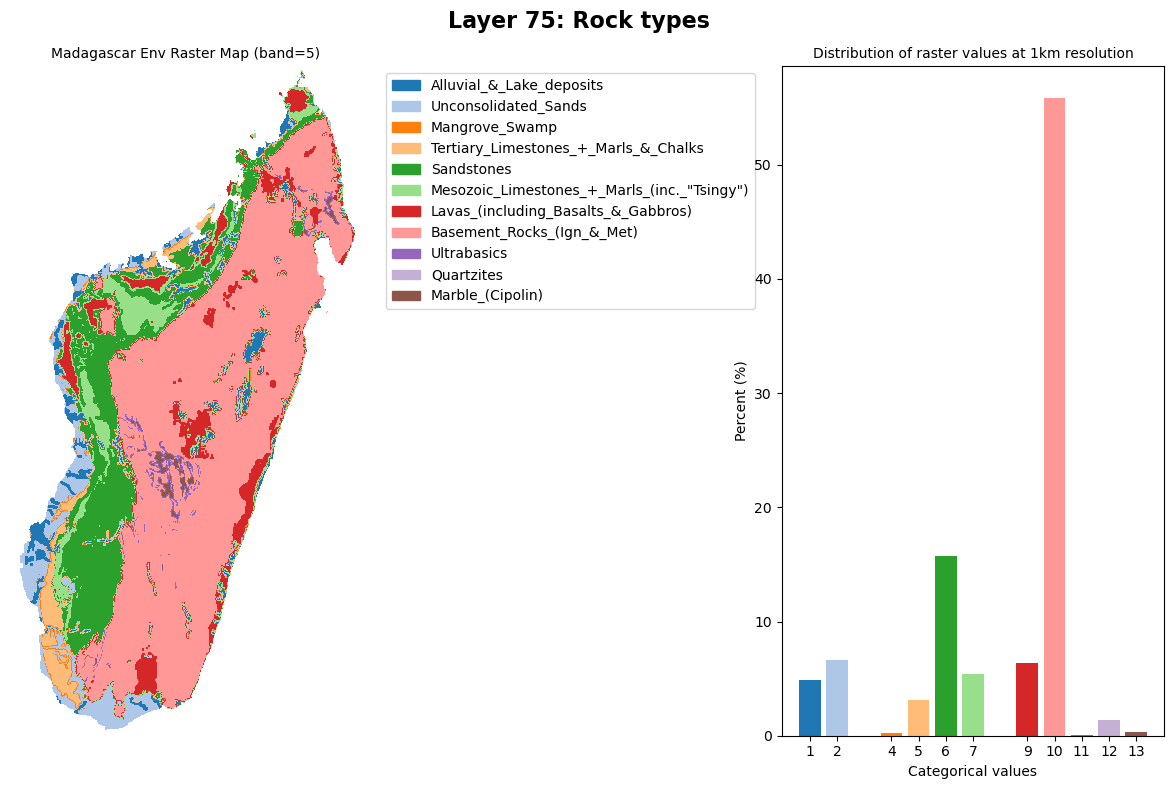

In [34]:
mada_rasters.plot_layer(list(categ_layers.keys())[0], subplots_figsize=(12, 8))

## Create a sample point and sample from the rasters using MadaclimPoint

### Geographic location and CRS validation of the sample

Create a MadaclimPoint instance with required parameters `specimen_id`, `longitude`, `latitude`

In [35]:
from py_madaclim.raster_manipulation import MadaclimPoint

specimen_1 = MadaclimPoint(
    specimen_id="abbayesii", 
    longitude=46.8624,    # Default CRS of EPSG:4326
    latitude=-24.7541
    )
print(specimen_1)

MadaclimPoint(
	specimen_id = abbayesii,
	source_crs = 4326,
	longitude = 46.8624,
	latitude = -24.7541,
	mada_geom_point = POINT (688328.2403248843 7260998.022932809),
	sampled_layers = None (Not sampled yet),
	nodata_layers = None (Not sampled yet),
	is_categorical_encoded = False,
	gdf.shape = (1, 8)
)


Creates a shapely point object according to the Madaclim CRS' projection when instantiating a new instance

In [36]:
print(f"Shapely point geometry for {specimen_1.specimen_id}: {specimen_1.mada_geom_point}")
print(f"The projection of the Madaclim rasters': {mada_rasters.clim_crs}")

Shapely point geometry for abbayesii: POINT (688328.2403248843 7260998.022932809)
The projection of the Madaclim rasters': EPSG:32738


Uses default EPSG:4326 CRS for both lat/lon when not specified. 

The constructor assumes that lat/lon are in the 4326 (GPS) projection. If a source_crs is given, it will validate the lat/lon if it is within possible bounds

In [37]:
specimen_1.source_crs    

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Regardless of the `source_crs` argument passed, the constructor will validate if the point can be reprojected to EPSG:32738. Thus samples must be located on Madagascar only

In [38]:
try:
    error_test = MadaclimPoint(specimen_id="error_test", latitude=55123, longitude=-123123, source_crs=3333)
except ValueError as e:
    print(e)

longitude=-123123.0 is out of bounds of the Madaclim rasters' for error_test.
Longitude must fall between 6379618.136561 and 7617913.891767 (according to `source_crs`).


The `MadaclimPoint` constructor also accepts any other `kwargs` and saves them as attributes with the relevant type

In [39]:
spe1_info = {
    "genus": "Coffea",
    'species': 'abbayesii',
    'specimen_id': 'ABA',
    'has_sequencing': True,
    'botanical_series': 'Millotii',
    'genome_size (2C. pg)': 1.25,
    'latitude': -24.7541,
    'longitude': 46.8624
}

spe1 = MadaclimPoint(**spe1_info)
print(spe1)

MadaclimPoint(
	specimen_id = ABA,
	source_crs = 4326,
	longitude = 46.8624,
	latitude = -24.7541,
	mada_geom_point = POINT (688328.2403248843 7260998.022932809),
	sampled_layers = None (Not sampled yet),
	nodata_layers = None (Not sampled yet),
	is_categorical_encoded = False,
	genus = Coffea,
	species = abbayesii,
	has_sequencing = 1.0,
	botanical_series = Millotii,
	genome_size (2C. pg) = 1.25,
	gdf.shape = (1, 13)
)


Access the Geodataframe attribute with updated attributes

In [40]:
spe1.gdf

,specimen_id,source_crs,longitude,latitude,mada_geom_point,sampled_layers,nodata_layers,is_categorical_encoded,genus,species,has_sequencing,botanical_series,genome_size (2C. pg)
0,ABA,4326,46.8624,-24.7541,POINT (688328.240 7260998.023),None,None,False,Coffea,abbayesii,1.0,Millotii,1.25


Access all categories pooled together in a single list

In [41]:
#* CHECK
spe1.encoded_categ_labels

### Sample the rasters for a MadaclimPoint

We will sample the rasters based on the MadaclimPoint's location (`mada_geom_point` `Point` geometry) using the `sample_from_rasters` method.

In [42]:
print(spe1.sampled_layers)

None


In [43]:
print(f"Layers sampled for {spe1.specimen_id}: {spe1.sampled_layers}")

spe1.sample_from_rasters(
    clim_raster=mada_rasters.clim_raster, 
    env_raster=mada_rasters.env_raster, 
    layers_to_sample=[37, 55, 75],    # from a list of number layers
)

print(f"Layers sampled for {spe1.specimen_id}: {spe1.sampled_layers}")    # Updated `sampled_layers` dict

Layers sampled for ABA: None

######################################## Extracting data for: ABA ########################################

Sampling 2 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 55: Precipitation of coldest quarter:  100%|██████████| layer 2/2 [Time remaining: 00:00]



Sampling 1 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 75: Rock types:  100%|██████████| layer 1/1 [Time remaining: 00:00]


Finished raster sampling operation in 0.04 seconds.

Layers sampled for ABA: {'layer_37': 215, 'layer_55': 188, 'layer_75': 10}


We can customize the sampling procedure with the `layers_to_sample` and `layer_info` parameters.

In [44]:
# Extract and sample bioclim layers for spe1
bioclim_labels = [label for label in mada_info.get_layers_labels(as_descriptive_labels=True) if "bio" in label]
print(f"Sampling layers: {', '.join([label.split('_', 3)[-1] for label in bioclim_labels])}")

spe1.sample_from_rasters(
    clim_raster=mada_rasters.clim_raster, 
    env_raster=mada_rasters.env_raster, 
    layers_to_sample=bioclim_labels,
    layer_info=True
)
print()
print(f"There are {len(spe1.nodata_layers) if spe1.nodata_layers else 0} sampled layers with missing values")


Sampling layers: Annual mean temperature (degrees), Mean diurnal range (mean of monthly max temp - monthy min temp), Isothermality = BIO2/BIO7 x 100 (No units), Temperature seasonality (standard deviation x 100), Max temperature of warmest month (degrees), Min temperature of coldest month (degrees), Temperature annual range  = BIO5-BIO6 (degrees), Mean temperature of wettest quarter (degrees), Mean temperature of driest quarter (degrees), Mean temperature of warmest quarter (degrees), Mean temperature of coldest quarter (degrees), Annual precipitation (mm.year-1), Precipitation of wettest month (mm), Precipitation of driest month (mm), Precipitation seasonality (coefficient of variation), Precipitation of wettest quarter (mm.3months-1), Precipitation of driest quarter (mm.3months-1), Precipitation of warmest quarter (mm.3months-1), Precipitation of coldest quarter (mm.3months-1)

######################################## Extracting data for: ABA ########################################


Extracting layer 55: Precipitation of coldest quarter:  100%|██████████| layer 19/19 [Time remaining: 00:00]   



Finished raster sampling operation in 0.07 seconds.


There are 0 sampled layers with missing values


We can access the values and updated attributes to visualize the changes to the instance.

In [45]:
print(spe1)    # Updated attributes and Geodataframe

MadaclimPoint(
	specimen_id = ABA,
	source_crs = 4326,
	longitude = 46.8624,
	latitude = -24.7541,
	mada_geom_point = POINT (688328.2403248843 7260998.022932809),
	len(sampled_layers) = 19 layer(s),
	len(nodata_layers) = None (0 layers),
	is_categorical_encoded = False,
	genus = Coffea,
	species = abbayesii,
	has_sequencing = 1.0,
	botanical_series = Millotii,
	genome_size (2C. pg) = 1.25,
	gdf.shape = (1, 32)
)


In [46]:
spe1.sampled_layers    # Dynamically updated attributes

{'clim_37_bio1_Annual mean temperature (degrees)': 215,
 'clim_38_bio2_Mean diurnal range (mean of monthly max temp - monthy min temp)': 112,
 'clim_39_bio3_Isothermality = BIO2/BIO7 x 100 (No units)': 63,
 'clim_40_bio4_Temperature seasonality (standard deviation x 100)': 2597,
 'clim_41_bio5_Max temperature of warmest month (degrees)': 297,
 'clim_42_bio6_Min temperature of coldest month (degrees)': 120,
 'clim_43_bio7_Temperature annual range  = BIO5-BIO6 (degrees)': 177,
 'clim_44_bio8_Mean temperature of wettest quarter (degrees)': 238,
 'clim_45_bio9_Mean temperature of driest quarter (degrees)': 186,
 'clim_46_bio10_Mean temperature of warmest quarter (degrees)': 238,
 'clim_47_bio11_Mean temperature of coldest quarter (degrees)': 180,
 'clim_48_bio12_Annual precipitation (mm.year-1)': 1260,
 'clim_49_bio13_Precipitation of wettest month (mm)': 204,
 'clim_50_bio14_Precipitation of driest month (mm)': 44,
 'clim_51_bio15_Precipitation seasonality (coefficient of variation)': 56,

We can use the `MadaclimLayers` labels to access specific columns of the updated Geodataframe

In [47]:
spe1.gdf[bioclim_labels]

,clim_37_bio1_Annual mean temperature (degrees),clim_38_bio2_Mean diurnal range (mean of monthly max temp - monthy min temp),clim_39_bio3_Isothermality = BIO2/BIO7 x 100 (No units),clim_40_bio4_Temperature seasonality (standard deviation x 100),clim_41_bio5_Max temperature of warmest month (degrees),clim_42_bio6_Min temperature of coldest month (degrees),clim_43_bio7_Temperature annual range = BIO5-BIO6 (degrees),clim_44_bio8_Mean temperature of wettest quarter (degrees),clim_45_bio9_Mean temperature of driest quarter (degrees),clim_46_bio10_Mean temperature of warmest quarter (degrees),clim_47_bio11_Mean temperature of coldest quarter (degrees),clim_48_bio12_Annual precipitation (mm.year-1),clim_49_bio13_Precipitation of wettest month (mm),clim_50_bio14_Precipitation of driest month (mm),clim_51_bio15_Precipitation seasonality (coefficient of variation),clim_52_bio16_Precipitation of wettest quarter (mm.3months-1),clim_53_bio17_Precipitation of driest quarter (mm.3months-1),clim_54_bio18_Precipitation of warmest quarter (mm.3months-1),clim_55_bio19_Precipitation of coldest quarter (mm.3months-1)
0,215,112,63,2597,297,120,177,238,186,238,180,1260,204,44,56,484,159,484,188


**Sampling categorical data**

The categorical layers can be accessed with the `get_categorical_combinations` from a `MadaclimLayers` instance

In [48]:
categ_layers = mada_info.get_categorical_combinations()
categ_layers["layer_75"]

{1: 'Alluvial_&_Lake_deposits',
 2: 'Unconsolidated_Sands',
 4: 'Mangrove_Swamp',
 5: 'Tertiary_Limestones_+_Marls_&_Chalks',
 6: 'Sandstones',
 7: 'Mesozoic_Limestones_+_Marls_(inc._"Tsingy")',
 9: 'Lavas_(including_Basalts_&_Gabbros)',
 10: 'Basement_Rocks_(Ign_&_Met)',
 11: 'Ultrabasics',
 12: 'Quartzites',
 13: 'Marble_(Cipolin)'}

In [49]:
# Sampling all possible data will contain the 4 categorical layers
spe1.sample_from_rasters(
    clim_raster=mada_rasters.clim_raster, 
    env_raster=mada_rasters.env_raster,
)


######################################## Extracting data for: ABA ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 68: Annual potential evapotranspiration from the Thornthwaite equation:  96%|█████████▌| layer 67/70 [Time remaining: 00:00]             

Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                 



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   



Finished raster sampling operation in 0.29 seconds.



Since we extracted all the layers possible in the example, some categorical data has been sampled.

In [50]:
print(spe1.is_categorical_encoded)

False


In [51]:
sampled_categ_layers = {layer: val for layer, val in spe1.sampled_layers.items() if layer in categ_layers}
for layer, raster_value in sampled_categ_layers.items():
    print(
        f"Categorical {layer} has a {raster_value=} for {spe1._specimen_id} "
        f"at position lon/lat=({spe1.longitude}, {spe1.latitude})"
    )

Categorical layer_75 has a raster_value=10 for ABA at position lon/lat=(46.8624, -24.7541)
Categorical layer_76 has a raster_value=9 for ABA at position lon/lat=(46.8624, -24.7541)
Categorical layer_77 has a raster_value=14 for ABA at position lon/lat=(46.8624, -24.7541)
Categorical layer_78 has a raster_value=5 for ABA at position lon/lat=(46.8624, -24.7541)


In [52]:
spe1.gdf[sampled_categ_layers.keys()]

,layer_75,layer_76,layer_77,layer_78
0,10,9,14,5


Encode the categorical layers using `binary_encode_categorical`

In [53]:
spe1.binary_encode_categorical()
print(spe1.is_categorical_encoded)
print(f"Shape of geodataframe post one-hot-encoding: {spe1.gdf.shape}")

True
Shape of geodataframe post one-hot-encoding: (1, 171)


The changes are reflected in the `encoded_categ_layers` attribute

In [54]:
# print(spe1.encoded_categ_layers)
spe1.encoded_categ_layers

{'layer_75_Alluvial_&_Lake_deposits': 0,
 'layer_75_Basement_Rocks_(Ign_&_Met)': 1,
 'layer_75_Lavas_(including_Basalts_&_Gabbros)': 0,
 'layer_75_Mangrove_Swamp': 0,
 'layer_75_Marble_(Cipolin)': 0,
 'layer_75_Mesozoic_Limestones_+_Marls_(inc._"Tsingy")': 0,
 'layer_75_Quartzites': 0,
 'layer_75_Sandstones': 0,
 'layer_75_Tertiary_Limestones_+_Marls_&_Chalks': 0,
 'layer_75_Ultrabasics': 0,
 'layer_75_Unconsolidated_Sands': 0,
 'layer_75__nodata': 0,
 'layer_76_Alluvio-colluvial_Deposited_Soils': 0,
 'layer_76_Andosols': 1,
 'layer_76_Bare_Rocks': 0,
 'layer_76_Fluvio-marine_Deposited_Soils_-_Mangroves': 0,
 'layer_76_Highly_Rejuvenated,_Penevoluted_Ferralitic_Soils': 0,
 'layer_76_Humic_Ferralitic_Soils': 0,
 'layer_76_Humic_Rejuvenated_Ferralitic_Soils': 0,
 'layer_76_Hydromorphic_Soils': 0,
 'layer_76_Indurated-Concretion_Ferralitic_Soils': 0,
 'layer_76_Podzolic_Soils_and_Podzols': 0,
 'layer_76_Poorly_Evolved_Erosion_Soils,_Lithosols': 0,
 'layer_76_Raw_Lithic_Mineral_Soils': 0,


### Visualize a specimen's sampled value on the raster's map and distribution

Default visualizations of a MadaclimPoint on the raster map and raster distribution plot

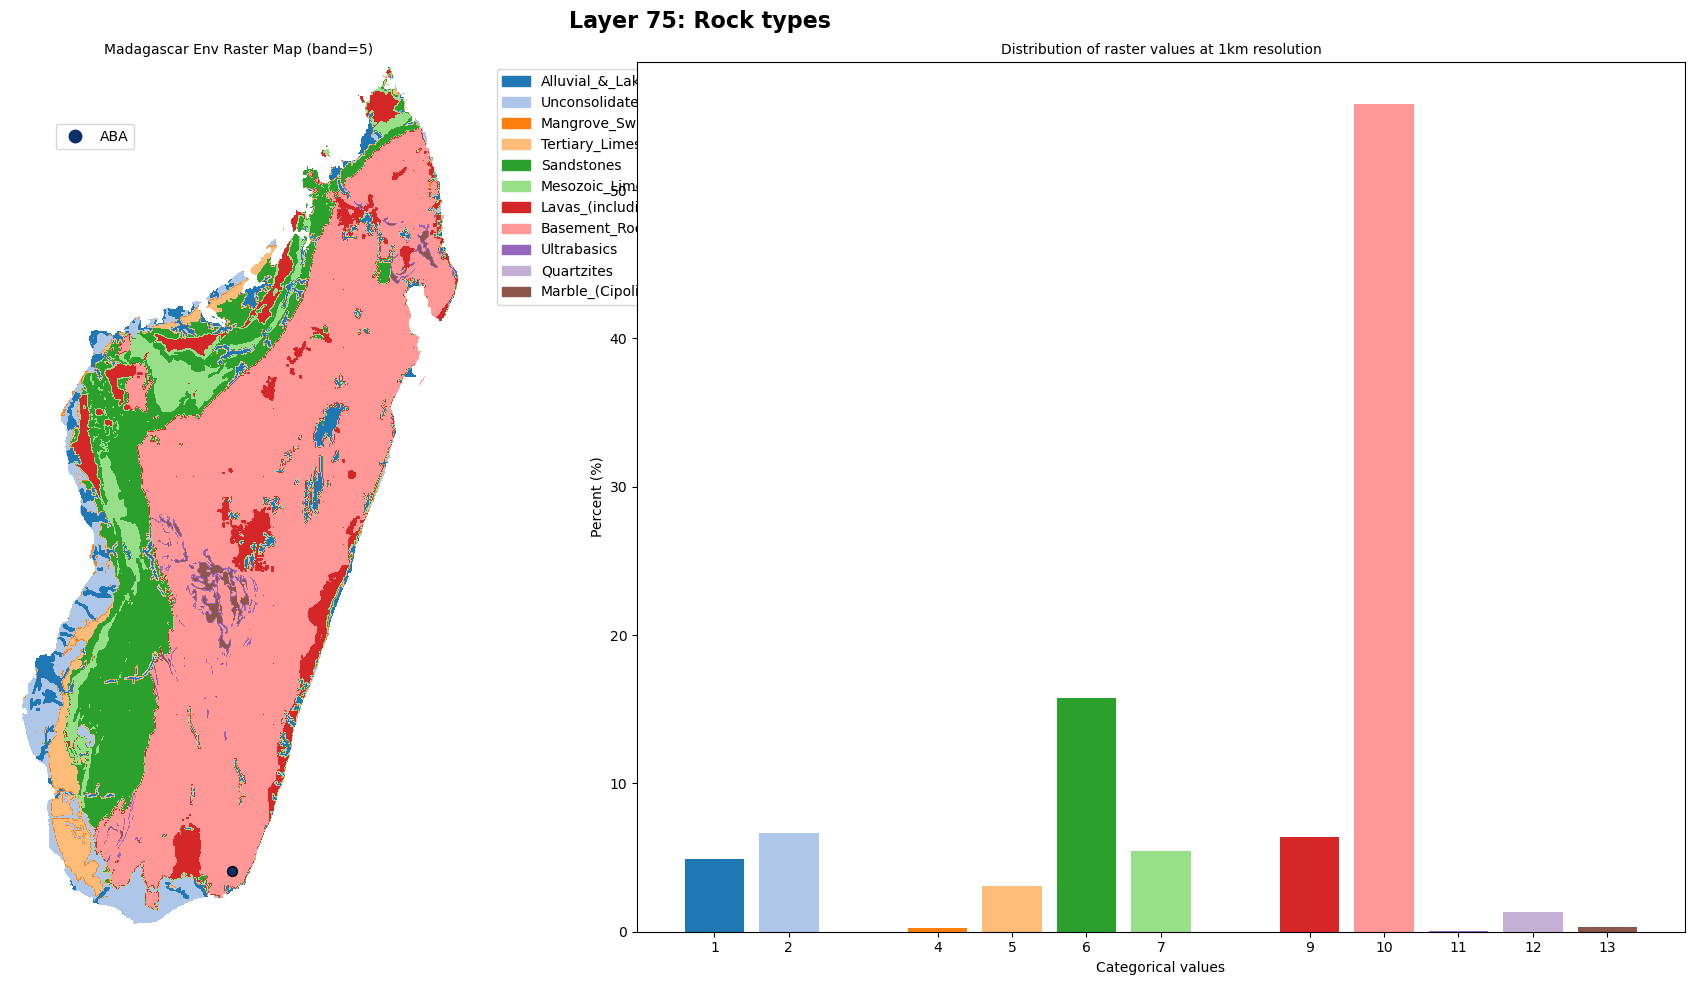

In [55]:
# Base visualization for categorical layers
spe1.plot_on_layer(list(sampled_categ_layers.keys())[0])

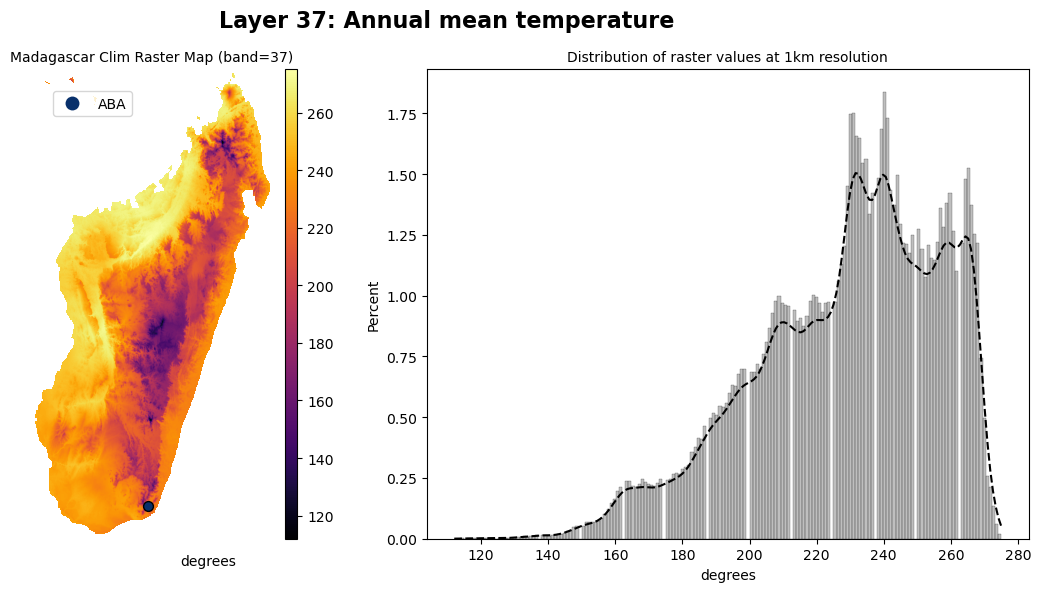

In [56]:
# Base visualization for continuous layers
spe1.plot_on_layer(bioclim_labels[0])

Customization for MadalcimPoint on raster map

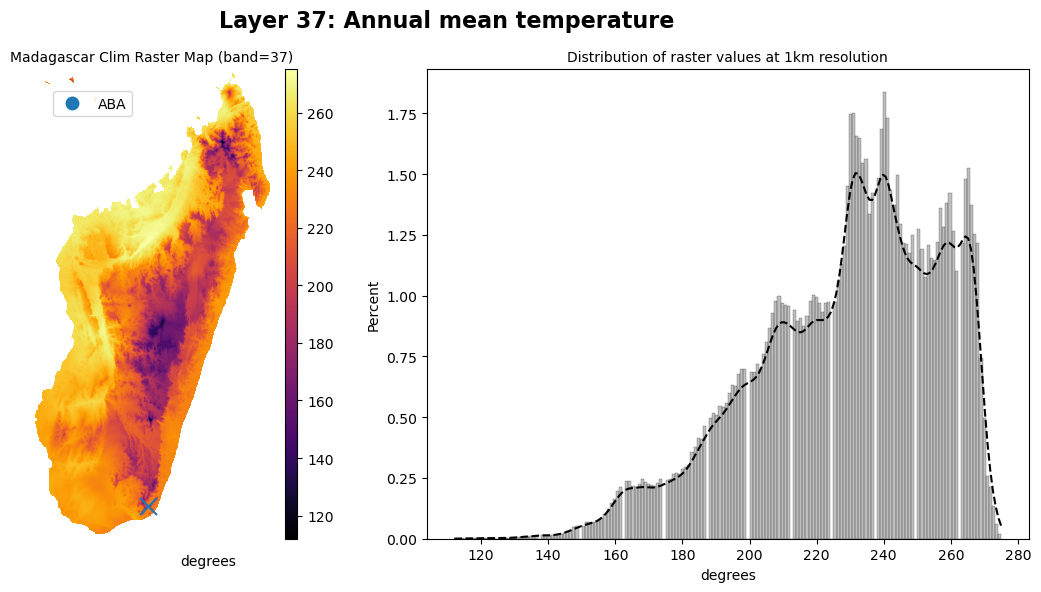

In [68]:
spe1.plot_on_layer(
    layer=bioclim_labels[0], 
    rasterpoint_cmap="tab10", 
    rasterpoint_markersize=150, 
    rasterpoint_marker="x", 
    rasterpoint_edgecolor=None)